In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score #calculate the mean squared error between the true and predicted values in a regression problem.
from sklearn.datasets import make_regression #generate synthetic regression problem for testing

import matplotlib.pyplot as plt #plot graphs
import seaborn as sns #plot based on matpolit
sns.set()
%matplotlib inline 
#used in Jupyter notebooks to display Matplotlib plots inline.

# evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# classifier we will use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# model selection bits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

# evaluation
from sklearn.metrics import f1_score

# plotting
#from plotting import plot_learning_curve, plot_validation_curve

print("Statistics project kick-off!")

Statistics project kick-off!


In [2]:
#M A C H I N E  L E A R N I N G 
import pandas as pd #Load data in tabular format
df5_Updated_1 = pd.read_csv("df5_Update_1.csv") #Load the file from the specific folder

In [3]:
#M A C H I N E  L E A R N I N G 
#Identify the library for the df:
type(df5_Updated_1)

pandas.core.frame.DataFrame

In [4]:
df5_Updated_1

,Unnamed: 0,ID,SEX,AGE,ACC,ACC_TIME,ACC_DAYS,HRV,HRV_TIME,HRV_HOURS,...,HADS_D,MED,MED_Antidepr,MED_Moodstab,MED_Antipsych,MED_Anxiety_Benzo,MED_Sleep,MED_Analgesics_Opioids,MED_Stimulants,filter_$
0,0,1,0,3,1,16:00:00,6,1,11:00:00,21.0,...,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,2,0,4,1,10:54:00,6.8,0,NaN,NaN,...,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2,3,1,2,1,15:28:00,7.2,1,15:25:00,21.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3,4,1,3,0,NaN,NaN,1,16:55:00,22.0,...,6.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,0.0
4,4,5,1,1,1,14:24:00,5.9,1,16:00:00,12.0,...,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,236,1,2,1,9:30:00,"13,3",0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,130,237,0,1,1,15:00:00,14,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,131,238,0,4,1,9:00:00,"14,6",0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,132,239,0,4,1,9:00:00,"14,3",0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#CREATING VARIABLES IN NEW DATA SET (again)
    #For learning purposes and analysis of the statistics EDA results, the variables for X and Y remain the same. X= df5[['ADHD', 'AGE']], Y= df5[['ANXIETY', 'SUBSTANCE']]
    #Just a note that the variables for Y will be separated in this Machine Learning notebook prior to starting the data SPLIT. e.g., Y= updated df5[['ANXIETY']], Y= updated df5[['SUBSTANCE']]

In [6]:
#X= data[['ADHD', 'AGE']] #Setting the columns parameters that will be analyzed for variable X
#ADHD: not present (0), present (1), or unknown (9). ADHD Qualitative>Nominal>Categorical variable.
#AGE:  Groups (1) = 17-29 years, (2) = 30-39 years, (3) = 40-49 years and (4) = 50-67 years. AGE Qualitative>Ordinal variable
#X
X= df5_Updated_1[['ADHD', 'AGE']]

In [7]:
#Y= data[['ANXIETY','SUBSTANCE']] #Y= Target variable. Potential to include more variables for Y here. Lucky variables may impact the results of Y.
#ANXIETY: not present (0), present (1), or unknown (9). ANXIETY Qualitative>Nominal variable
#SUBSTANCE: not present (0), present (1), or unknown (9). SUBSTANCE Qualitative>Nominal variable
#Y
Y= df5_Updated_1[['SUBSTANCE']]

In [8]:
data = df5_Updated_1 #Preprocess the data. The updated name for the data frame is:df5_Updated_1. The file has the empty values removed.

In [9]:
#M A C H I N E  L E A R N I N G 
#This project os a Classification tree for multi-class classification. Will use decision tree algorithm designed to categorize instances into three or more classes or categories based on the values of input features.
#Decision trees are built to maximize purity in their children nodes.  Decrease entropy=information gain ratio. Entropy is a measurement of information that is encoded within a message. 
    #X = #AGE: Participant ages are presented in four groups, where (1) = 17-29 years, (2) = 30-39 years, (3) = 40-49 years and (4) = 50-67 years.
                #AGE Qualitative>Ordinal variable 
         #ADHD: General presece of ADHD n=51. not present (0), present (1), or unknown (9). 
                #ADHD Qualitative>Nominal>Categorical variable. 
    #Y = ANXIETY: not present (0), present (1), or unknown (9) 
                #Qualitative>Nominal variable
         #SUBSTANCE: drug, alcohol, addictions. not present (0), present (1), or unknown (9)
                #Qualitative>Nominal variable 
#Note: Decision Tree do not scale data.

In [10]:

#M A C H I N E  L E A R N I N G 
#data is not scale as we are using a decision tree.
#check if data is empty
data.isnull().any().sum()

18

In [11]:
Y

,SUBSTANCE
0,0
1,0
2,1
3,1
4,0
...,...
128,0
129,0
130,0
131,0


In [12]:
#M A C H I N E  L E A R N I N G # (LAB 7)

#PROBABILITY
    #Train a Decision Tree Classifier
    #Train-Test Data Split
        #-Size, Random State, Stratify
        #Train Data:80% or 70%
        #Test Data: 20% or 30% 

    #TRAIN TEST SPLIT
        ##Divide up the dataset to have an unseen test set that we can evaluate against.Simulation!
        #Creatw a table that samples the patients, and determining whether they developed anxiety or substance abuse. This serves as positive and negative examples the model can learn from.
        #Depending of the outcome additional data columns can be included to the model to identify more patterns and make accurate predictions.

    #DECISION TREE
        #Train Data:80% or 70% STRATIFY
        #Test Data: 20% or 30% STRATIFY
        #set the test size! 0.2 is 20% for TEST and TRAINING 0.8 for 80%. Sample size is 103 (103 for 20% = 20.6) (103 for 80% = 82.4)

#X_train, X_test, Y_train, Y_train = train_test_split(X, Y, train_size= 0.8, stratify = Y) 
    #ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2
    #Stratification: needs equal representation groups, if few cases then I do not have enough members. So chose random_state.

# Changed to random_state

In [13]:
#SPLIT THE DATA #Preprocess the data
    #X_train: Predictors for X (ADHD, AGE)
    #Y_train: labels of training set Y (ANXIETY, SUBTANCE)
    #X_test: predictor 20% for (ADHD, AGE)
    #Y_test: label (ANXIETY, SUBTANCE)
    #train_test_split divides the dataset X and y into a training set (X_train and y_train) and a testing set (X_test and y_test)
    #Test_size=0.2 specifies that 20% of the data should be used for testing
    #random_state=42 ensures reproducibility by fixing the random seed
    #y_test is the true target values corresponding to the test set observations, and it's used to evaluate the model's predictions and calculate accuracy and the confusion matrix
    #Four data frames creation for trainign and testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)


In [14]:
X_train.head() #Predictors for X

,ADHD,AGE
125,0,4
109,0,3
78,0,2
80,1,3
97,0,4


In [15]:
X_test.head() #Predictors for X

,ADHD,AGE
51,1,4
69,0,1
31,0,4
42,0,4
117,0,4


In [16]:
Y_train.head()

,SUBSTANCE
125,0
109,0
78,1
80,1
97,0


In [17]:
Y_test.head()

,SUBSTANCE
51,0
69,0
31,0
42,1
117,0


In [18]:
#MODELING
#What is a Model?: an equation with constants and variables(Algorithms y= Wx+b) when going through multiple iterations of adjustments in parameters (weights(W) and biases(b))  values based on data becomes a model. This final outcome with trained variables(weights and biases) is used to make predictions.

# Select a Model and TRAIN THE DECISION TREE MODEL
# Instantiate the Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Train the model using the training data
dtc.fit(X_train, Y_train)

# Make predictions on the training and testing data. 
# # Make predictions: y_pred = model.predict(X_test) is the variable test_preds = dtc.predict(X_test)
#did the model overfit?
train_preds = dtc.predict(X_train)
test_preds = dtc.predict(X_test) #y_pred = model.predict(X_test)

In [19]:
# This code is the constructor signature for the DecisionTreeClassifier in scikit-learn.
# Define the arguments and allows for fine-tuning the behavior of the decision tree model. In addition, the customization of parameters such as class weights, splitting criteria, tree depth, impurity decrease threshold, sample leaf and split sizes, and random state for reproducibility.
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, random_state=None, splitter='best')

DecisionTreeClassifier()

In [20]:
len(X_train),len(X_test) # to view the total number of samples in eas variable to confirm there are 133 after the deta was cleanned.

(106, 27)

In [21]:
len(Y_train),len(Y_test) # to view the total number of samples in eas variable to confirm there are 133 after the deta was cleanned.

(106, 27)

[Text(0.5454545454545454, 0.9, 'x[0] <= 0.5\ngini = 0.294\nsamples = 106\nvalue = [87, 19]'),
 Text(0.36363636363636365, 0.7, 'x[1] <= 3.5\ngini = 0.187\nsamples = 67\nvalue = [60, 7]'),
 Text(0.2727272727272727, 0.5, 'x[1] <= 2.5\ngini = 0.165\nsamples = 55\nvalue = [50, 5]'),
 Text(0.18181818181818182, 0.3, 'x[1] <= 1.5\ngini = 0.18\nsamples = 40\nvalue = [36, 4]'),
 Text(0.09090909090909091, 0.1, 'gini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.2727272727272727, 0.1, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.36363636363636365, 0.3, 'gini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.45454545454545453, 0.5, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.7272727272727273, 0.7, 'x[1] <= 1.5\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.6363636363636364, 0.5, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.8181818181818182, 0.5, 'x[1] <= 3.5\ngini = 0.464\nsamples = 30\nvalue = [19, 11]'),
 Text(0.7272727272727273, 0.3, 'x[1] <= 2.5\ngi

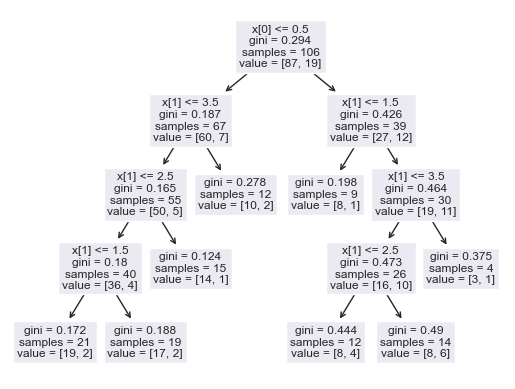

In [22]:
from sklearn import tree
tree.plot_tree(dtc)

In [23]:
## Load in the dataset here
data = pd.read_csv('df5_Update_1.csv', names = None)

In [24]:
print(test_preds) #test_preds shows Y = [SUBSTANCE]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
#MODEL MEASUREMENTS
import time

# Measure training time
start_time = time.time()
dtc.fit(X_train, Y_train)
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")
#The result of 0.0030031204223632812 seconds indicates that the machine learning model is very efficient and can quickly learn from the given training data.

Training Time: 0.01613593101501465 seconds


In [26]:
#MODEL MEASUREMENTS
# Measure prediction time
start_time = time.time()
test_preds = dtc.predict(X_test)
prediction_time = time.time() - start_time
print("Prediction Time:", prediction_time, "seconds")
#The result of 0.000995635986328125 seconds indicates that the model is highly efficient, capable of quick training, and suitable for real-time or resource-constrained applications.

Prediction Time: 0.0037224292755126953 seconds


In [27]:
#MODEL MEASUREMENTS
## F1_score: balanced F-score or F-measure. Performance, precission, recall. 

f1 = f1_score(Y_test, test_preds, average='weighted')
print("F1 Score (weighted average):", f1) # the result was 73% and indicates that the model's overall performance for precision and recall is reasonably good
print(f"F1-score training is {f1_score(Y_train, train_preds)} \n") #the result was 0.0 indicating taht potential issues happen, such as model overfitting or a poorly fitted model
print(f"F1-score testing is {f1_score(Y_test, test_preds)}") #the result was 0.0 indicating taht potential issues happen, such as model overfitting or a poorly fitted model

#Recomendation is to re-evaluate the model training process, have different algorithms, revisiting the data preprocessing steps to improve the model's performance and generalization to reach at least 80%.


F1 Score (weighted average): 0.7316704459561602
F1-score training is 0.0 

F1-score testing is 0.0


In [28]:
#MODEL MEASUREMENTS
# Calculate accuracy
accuracy = accuracy_score(Y_test, test_preds)
print("Accuracy:", accuracy)

#the accuracy result was 0.8148148148148148 indicates that the model predicts the target variable approximately 81.48% of the time. The recommendation is to evaluate the model's performance with additional metrics.

Accuracy: 0.8148148148148148


In [29]:
#MODEL MEASUREMENTS
#The confusion matrix describes the model's performance in terms of: true positive, true negative, false positive, and false negative predictions.
from sklearn.metrics import confusion_matrix

#MODEL MEASUREMENTS
conf_matrix = confusion_matrix(Y_test, test_preds)
#confusion_df = pd.DataFrame(conf_matrix, index=Y, columns=Y)
print("Confusion Matrix:")
print(conf_matrix)

#The results shows that:
#True positive (TP) 22 the model predicted 22 instances as positive
#False Negative (FN) 0 There are no instances 
#False Positive (FP) 5  The model incorrectly predicted 5 instances as positive when they were actually negative.
#True Negative (TN) 0  There are no instances 
#The model's performance seems to be heavily skewed towards predicting positive instances

Confusion Matrix:
[[22  0]
 [ 5  0]]


In [30]:
#M A C H I N E  L E A R N I N G   M O D E L   R E S U L T S
#ADABOOST CLASSIFIER
    #used to improve the performance of a weak learner (e.g., a decision tree) by combining multiple instances of it. 
# Create the AdaBoost classifier
Adb_Classifier=AdaBoostClassifier(estimator=DecisionTreeClassifier()) #instanciation of the model i wanted but no data.
Adb_Classifier

AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [31]:
#M A C H I N E  L E A R N I N G   M O D E L   R E S U L T S

#ADABOOST CLASSIFIER
# Train the classifier
Adb_Classifier.fit(X_train, Y_train) #model has been created, with fit, this is the model

# Make predictions
test_preds = Adb_Classifier.predict(X_test) # 

# Calculate accuracy
accuracy = accuracy_score(Y_test, test_preds)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, test_preds)
print("\nConfusion Matrix:\n", conf_matrix)

#Analysis: the AdaBoost model correctly predicted the outcome for approximately 81.48% of the total instances in the dataset used for evaluation.
#The confusion matrix [[22 0] [ 5 0]] indicates the following: True Negative (TN): 22, False Positive (FP): 0, False Negative (FN): 5, True Positive (TP): 0

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8148148148148148

Confusion Matrix:
 [[22  0]
 [ 5  0]]


In [32]:
#M A C H I N E  L E A R N I N G   M O D E L   R E S U L T S
#ADABOOST CLASSIFIER 
#hyperparameter tuning,to optimize their performance. Using techniques like grid search or random search to find the best combination of hyperparameters for each model
adb_param_grid = {'n_estimators': [10, 50, 100], 'learning_rate':[0.01, 0.1, 1]} #this is the number of trees to be searched hyperparameter

adb_model = AdaBoostClassifier()
adb_grid_search = GridSearchCV(adb_model, adb_param_grid, cv=5) #Cross-Validation (CV): #Perform cross-validation to assess the generalization capability of the models and ensure that they are not overfitting the training data. 
adb_grid_search.fit(X_train, Y_train)

print("\nAdaBoost Best Parameters:", adb_grid_search.best_params_)
print("AdaBoost Best Estimator:", adb_grid_search.best_estimator_)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan


AdaBoost Best Parameters: {'learning_rate': 0.01, 'n_estimators': 10}
AdaBoost Best Estimator: AdaBoostClassifier(learning_rate=0.01, n_estimators=10)


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
#M A C H I N E  L E A R N I N G   M O D E L   R E S U L T S
#RANDOM FOREST 
    #builds multiple decision trees and merges them together to get a more accurate and stable prediction.

# Create the Random Forest classifier
Random_Forest = RandomForestClassifier() #instanciation of the model i wanted but no data.
Random_Forest

RandomForestClassifier()

In [34]:
#M A C H I N E  L E A R N I N G   M O D E L   R E S U L T S
#RANDOM FOREST 
    #builds multiple decision trees and merges them together to get a more accurate and stable prediction.

# Train the classifier
Random_Forest.fit(X_train, Y_train) #model has been created, with fit, this is the model.

# Make predictions
test_preds = Random_Forest.predict(X_test) 

# Evaluate the classifier
print("Accuracy:", accuracy_score(Y_test, test_preds)) 
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, test_preds))
#print("\nClassification Report:\n", classification_report(Y_test, test_preds))

#Analysis: #an accuracy of 0.8148148148148148 suggests that the Random Forest model's predictive performance is around 81.48%, indicating its ability to make correct predictions on the given dataset.
#The confusion matrix [[22 0] [ 5 0]] indicates the following: #True Negative (TN): 22, False Positive (FP): 0, False Negative (FN): 5, True Positive (TP): 0

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8148148148148148

Confusion Matrix:
 [[22  0]
 [ 5  0]]


In [35]:
#MACHINE LEARNING MODEL RESULTS
#RANDOM FOREST 
#Y = np.ravel(Y) 

In [36]:
#MACHINE LEARNING MODEL RESULTS
#RANDOM FOREST 
#hyperparameter tuning, to optimize their performance. Using techniques like grid search or random search to find the best combination of hyperparameters for each model
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
} 
#this is the number of trees to be searched hyperparameter
    #n_estimators: The number of trees in the forest e.g,. 100
    #max_depth: The maximum depth of the trees in the random forest. e.g,. 10
    #min_samples_split: The minimum number of samples required to split an internal node e.g,. 2
    #min_samples_leaf: The minimum number of samples required to be at a leaf node. e.g,. 1
    


In [37]:
#MACHINE LEARNING MODEL RESULTS
#RANDOM FOREST 
#hyperparameter tuning, to optimize their performance. Using techniques like grid search or random search to find the best combination of hyperparameters for each model

rf_model = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5) #Cross-Validation (CV): #Perform cross-validation to assess the generalization capability of the models and ensure that they are not overfitting the training data. 
rf_grid_search.fit(X_train, Y_train)

print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Estimator:", rf_grid_search.best_estimator_)


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best Estimator: RandomForestClassifier(max_depth=10)


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = co

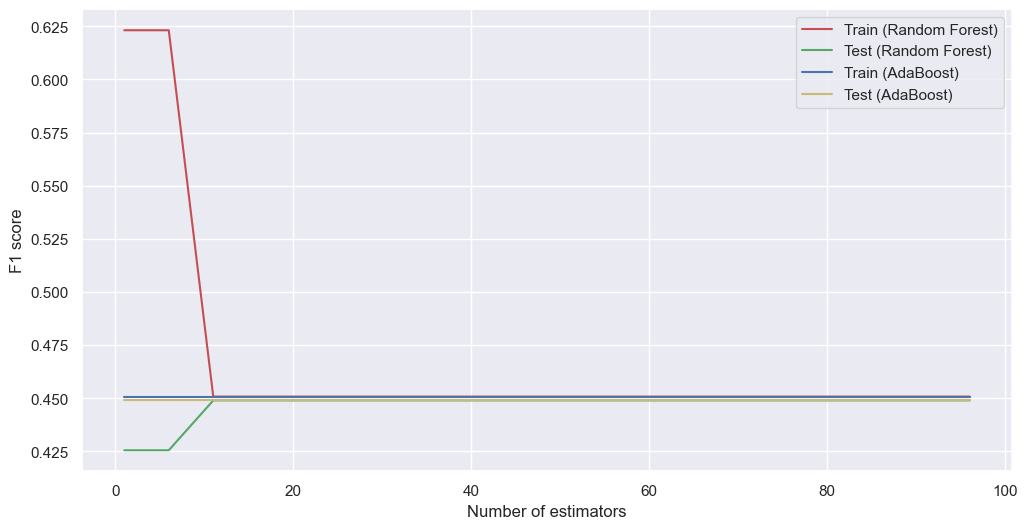

In [38]:
#MACHINE LEARNING MODEL RESULTS PLOT
train_results_rf = []
test_results_rf = []
train_results_ada = []
test_results_ada = []
param_range = np.arange(1, 100, 5)

for param in param_range:
    rf = RandomForestClassifier(n_estimators=param, random_state=0) #random_state=0 ensures the graph does not change.It sets the seed for random number generation, allowing the same results to be produced every time the code is run.
    ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=param, random_state=0)
    rf.fit(X_train, Y_train)
    ada.fit(X_train, Y_train)
    train_results_rf.append(f1_score(Y_train, rf.predict(X_train), average='macro'))
    test_results_rf.append(f1_score(Y_test, rf.predict(X_test), average='macro'))
    train_results_ada.append(f1_score(Y_train, ada.predict(X_train), average='macro'))
    test_results_ada.append(f1_score(Y_test, ada.predict(X_test), average='macro'))
plt.figure(figsize=(12, 6))
plt.plot(param_range, train_results_rf, label='Train (Random Forest)', color='r')
plt.plot(param_range, test_results_rf, label='Test (Random Forest)', color='g')
plt.plot(param_range, train_results_ada, label='Train (AdaBoost)', color='b')
plt.plot(param_range, test_results_ada, label='Test (AdaBoost)', color='y')
plt.xlabel('Number of estimators')
plt.ylabel('F1 score')
plt.legend()
plt.show()

In [39]:

#ANALYSIS MACHINE LEARNING MODEL RESULTS
#Y= SUBSTANCE
#Cross-Validation: #Perform cross-validation to assess the generalization capability of the models and ensure that they are not overfitting the training data. 

#Performance Evaluation for the performance of Random Forest and AdaBoost models:
    #1. Accuracy: An accuracy of 0.8148148148148148 suggests that the Random Forest and model and the AdaBoost model's predictive performance is around 81.48%, of the total instances in the dataset used for evaluation.
        #Both models show the ability to make correct predictions on the given dataset moving from an original.
        #a. RANDOM FOREST 
            #(Red-Train) F1-score: 0.625 model achieved a moderate level of accuracy in predicting the training dataset. This indicates that the model performed reasonably well on the data it was trained on.
                                    #Model is performing well for precision and recall. Good generalization performance
            #(Green-Test) F1-score:0.425 model's performance decreased when applied to the testing dataset. This lower F1-score on the test dataset implies that the model may not generalize well to new, unseen data, indicating potential overfitting or a need for model improvement.  
            #The discrepancy between the Train F1-score (0.625) and Test F1-score (0.425) suggests potential overfitting.
        #b. ADABOOTS CLASSIFIER
            #(Blue-Train) F1-score: 0.45 approximately. it shows underfitting. The model is not good to generalize to the population using the test data.
            #(Yellow-Test) F1-score:0.45 approximately. it shows underfitting. The model is not good to generalize to the population using the test data.
            #AdaBoost model is not effectively capturing the underlying patterns in the data and is not generalizing well to unseen data. Even though 0.45, is indicating a balanced performance on both datasets.Further analysis, different models or ensemble methods may be necessary to improve the model's performance.
    #2. The confusion matrix [[22 0] [ 5 0]] indicates the following: #True Negative (TN): 22, False Positive (FP): 0, False Negative (FN): 5, True Positive (TP): 0. Same as the oroginal results.
    #3. Overfitting: It is possible that both models are overfitting the data leading to consistent but not necessarily accurate predictions. In this case, further evaluation, with cross-validation, and hyperparameter tuning are necessary.Inaddition, increasing the size and diversity of the training data could be explored to enhance the model's generalization capability. include ASRS variable in X for aaditional analysis.
